#  OMNI data introduction

Súbor: 2_data_introduction.ipynb

Program: Hospodárska informatika

Vypracovala: Veronika Motúzová

Diplomová práca: : Predikcia geomagnetickych búrok pomocou hlbokého učenia

Vedúci diplomovej práce: doc. Ing. Peter Butka, PhD.

Konzultanti: Ing. Viera Maslej Krešňáková, RNDr. Šimon Mackovjak, PhD.

pomocný zdroj: https://github.com/space-lab-sk/airglow_data-driven_model/blob/main/airglow_data_driven_modeling.ipynb

In [12]:
import numpy as np
import pandas as pd
import datetime
import math
from scipy import stats
import seaborn as sn
import matplotlib.dates as md
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

In [2]:
# set the plotting style and precision of displayed values
plt.style.use('default')
plt.style.use('seaborn-deep')
pd.set_option("display.precision", 2)

In [3]:
df = pd.read_csv('omni_full.csv')

In [4]:
len(df)

520443

In [5]:
df.columns

Index(['Unnamed: 0', 'time1', 'Rot$', 'IMF', 'PLS', 'IMF_PTS', 'PLS_PTS',
       'ABS_B', 'F', 'THETA_AV', 'PHI_AV', 'BX_GSE', 'BY_GSE', 'BZ_GSE',
       'BY_GSM', 'BZ_GSM', 'SIGMA$ABS_B', 'SIGMA$B', 'SIGMA$Bx', 'SIGMA$By',
       'SIGMA$Bz', 'T', 'N', 'V', 'PHI$V', 'THETA$V', 'Ratio', 'Pressure',
       'SIGMA$T', 'SIGMA$N', 'SIGMA$V', 'SIGMA$PHI$V', 'SIGMA$THETA$V',
       'SIGMA$ratio', 'E', 'Beta', 'Mach_num', 'Mgs_mach_num', 'PR$FLX_1',
       'PR$FLX_2', 'PR$FLX_4', 'PR$FLX_10', 'PR$FLX_30', 'PR$FLX_60', 'MFLX',
       'R', 'F10_INDEX', 'KP', 'DST', 'AE', 'AP_INDEX', 'AL_INDEX', 'AU_INDEX',
       'PC_N_INDEX', 'Solar_Lyman_alpha', 'Proton_QI', 'DST+1', 'DST+2',
       'DST+3', 'DST+4', 'DST+6', 'DST+8', 'DST+12', 'DST+24'],
      dtype='object')

In [6]:
df.shape

(520443, 64)

In [7]:
df.describe()

,Unnamed: 0,Rot$,IMF,PLS,IMF_PTS,PLS_PTS,ABS_B,F,THETA_AV,PHI_AV,...,Solar_Lyman_alpha,Proton_QI,DST+1,DST+2,DST+3,DST+4,DST+6,DST+8,DST+12,DST+24
count,520443.0,520443.00,520443.00,520443.00,520443.00,520443.00,396376.00,396376.00,396376.00,396376.00,...,5.20e+05,3.60e+05,520442.00,520441.00,520440.00,520439.00,520437.00,520435.00,520431.00,520419.00
mean,260221.0,2177.09,58.95,61.95,322.01,294.32,6.12,5.44,-0.24,202.77,...,7.32e-03,2.30e-02,-14.13,-14.13,-14.13,-14.13,-14.13,-14.13,-14.13,-14.13
std,150239.1,299.21,26.61,25.59,427.23,432.93,3.15,3.03,28.68,101.29,...,1.13e-03,4.10e-02,22.03,22.03,22.03,22.03,22.03,22.03,22.03,22.03
min,0.0,1771.00,1.00,1.00,1.00,1.00,0.40,0.10,-89.70,-90.00,...,5.65e-03,1.00e-04,-589.00,-589.00,-589.00,-589.00,-589.00,-589.00,-589.00,-589.00
25%,130110.5,1972.00,50.00,50.00,57.00,24.00,4.10,3.50,-18.20,123.30,...,6.33e-03,9.10e-03,-22.00,-22.00,-22.00,-22.00,-22.00,-22.00,-22.00,-22.00
50%,260221.0,2173.00,51.00,52.00,60.00,36.00,5.40,4.80,0.00,183.70,...,7.04e-03,1.51e-02,-10.00,-10.00,-10.00,-10.00,-10.00,-10.00,-10.00,-10.00
75%,390331.5,2374.00,71.00,97.00,999.00,999.00,7.30,6.50,17.90,303.10,...,8.08e-03,2.54e-02,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
max,520442.0,9999.00,99.00,99.00,999.00,999.00,62.00,60.70,90.00,360.00,...,1.12e-02,3.28e+00,81.00,81.00,81.00,81.00,81.00,81.00,81.00,81.00


In [11]:
df.head()

,time1,Rot$,IMF,PLS,IMF_PTS,PLS_PTS,ABS_B,F,THETA_AV,PHI_AV,...,F10_INDEX,KP,DST,AE,AP_INDEX,AL_INDEX,AU_INDEX,PC_N_INDEX,Solar_Lyman_alpha,Proton_QI
0,1963-01-01 01:00:00,1771.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,7.0,-5.0,143.0,3.0,99999.0,99999.0,NaN,6.19e-03,NaN
1,1963-01-01 02:00:00,1771.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,7.0,-5.0,66.0,3.0,99999.0,99999.0,NaN,6.19e-03,NaN
2,1963-01-01 03:00:00,1771.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,20.0,-3.0,51.0,7.0,99999.0,99999.0,NaN,6.19e-03,NaN
3,1963-01-01 04:00:00,1771.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,20.0,-3.0,95.0,7.0,99999.0,99999.0,NaN,6.19e-03,NaN
4,1963-01-01 05:00:00,1771.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,20.0,-6.0,57.0,7.0,99999.0,99999.0,NaN,6.19e-03,NaN


In [12]:
df.tail()

,time1,Rot$,IMF,PLS,IMF_PTS,PLS_PTS,ABS_B,F,THETA_AV,PHI_AV,...,F10_INDEX,KP,DST,AE,AP_INDEX,AL_INDEX,AU_INDEX,PC_N_INDEX,Solar_Lyman_alpha,Proton_QI
520438,2022-05-13 12:00:00,9999.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,99.0,2.0,9999.0,999.0,99999.0,99999.0,NaN,NaN,NaN
520439,2022-05-13 13:00:00,9999.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,99.0,4.0,9999.0,999.0,99999.0,99999.0,NaN,NaN,NaN
520440,2022-05-13 14:00:00,9999.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,99.0,5.0,9999.0,999.0,99999.0,99999.0,NaN,NaN,NaN
520441,2022-05-13 15:00:00,9999.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,99.0,5.0,9999.0,999.0,99999.0,99999.0,NaN,NaN,NaN
520442,2022-05-13 16:00:00,9999.0,99.0,99.0,999.0,999.0,NaN,NaN,NaN,NaN,...,NaN,99.0,4.0,9999.0,999.0,99999.0,99999.0,NaN,NaN,NaN


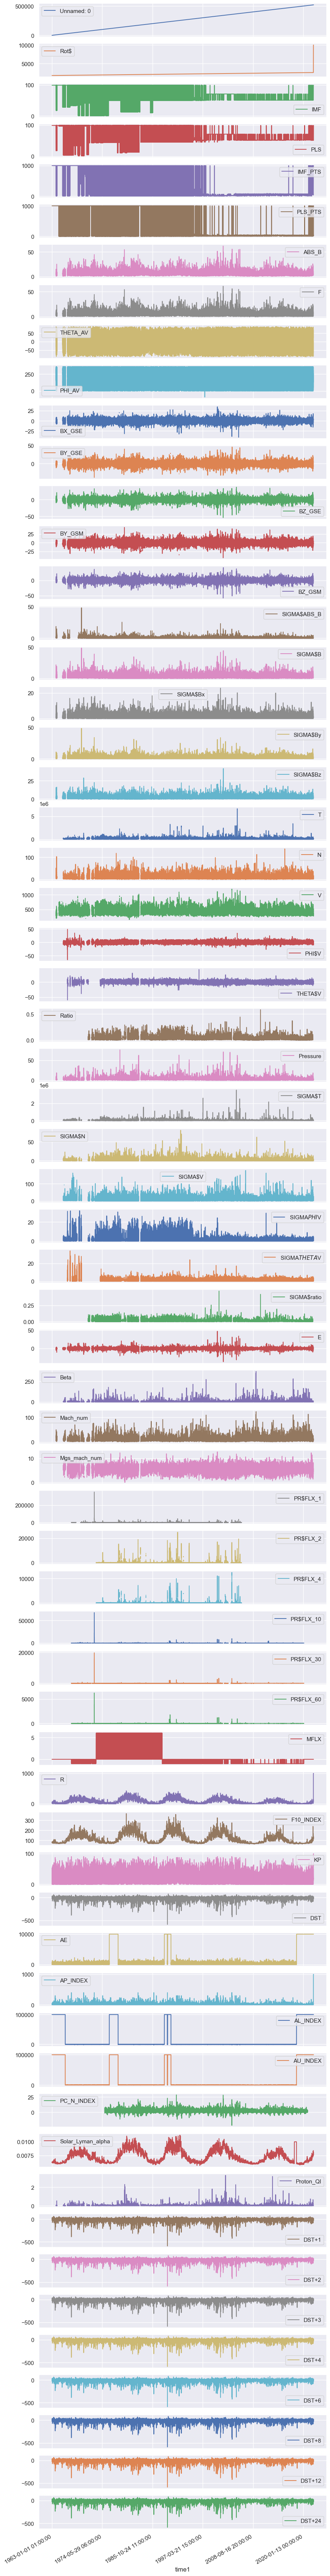

In [16]:
# quick view of data in main data frames
df.plot('time1',subplots=True, figsize=(10,100))
plt.show()

In [9]:
df.corr(method='pearson').iloc[46:47, 1:]

,Rot$,IMF,PLS,IMF_PTS,PLS_PTS,ABS_B,F,THETA_AV,PHI_AV,BX_GSE,...,Solar_Lyman_alpha,Proton_QI,DST+1,DST+2,DST+3,DST+4,DST+6,DST+8,DST+12,DST+24
KP,-0.04,0.06,0.06,0.09,0.1,0.55,0.46,-0.26,-7.42e-03,-7.17e-03,...,0.15,0.1,-0.55,-0.52,-0.48,-0.46,-0.41,-0.38,-0.33,-0.24


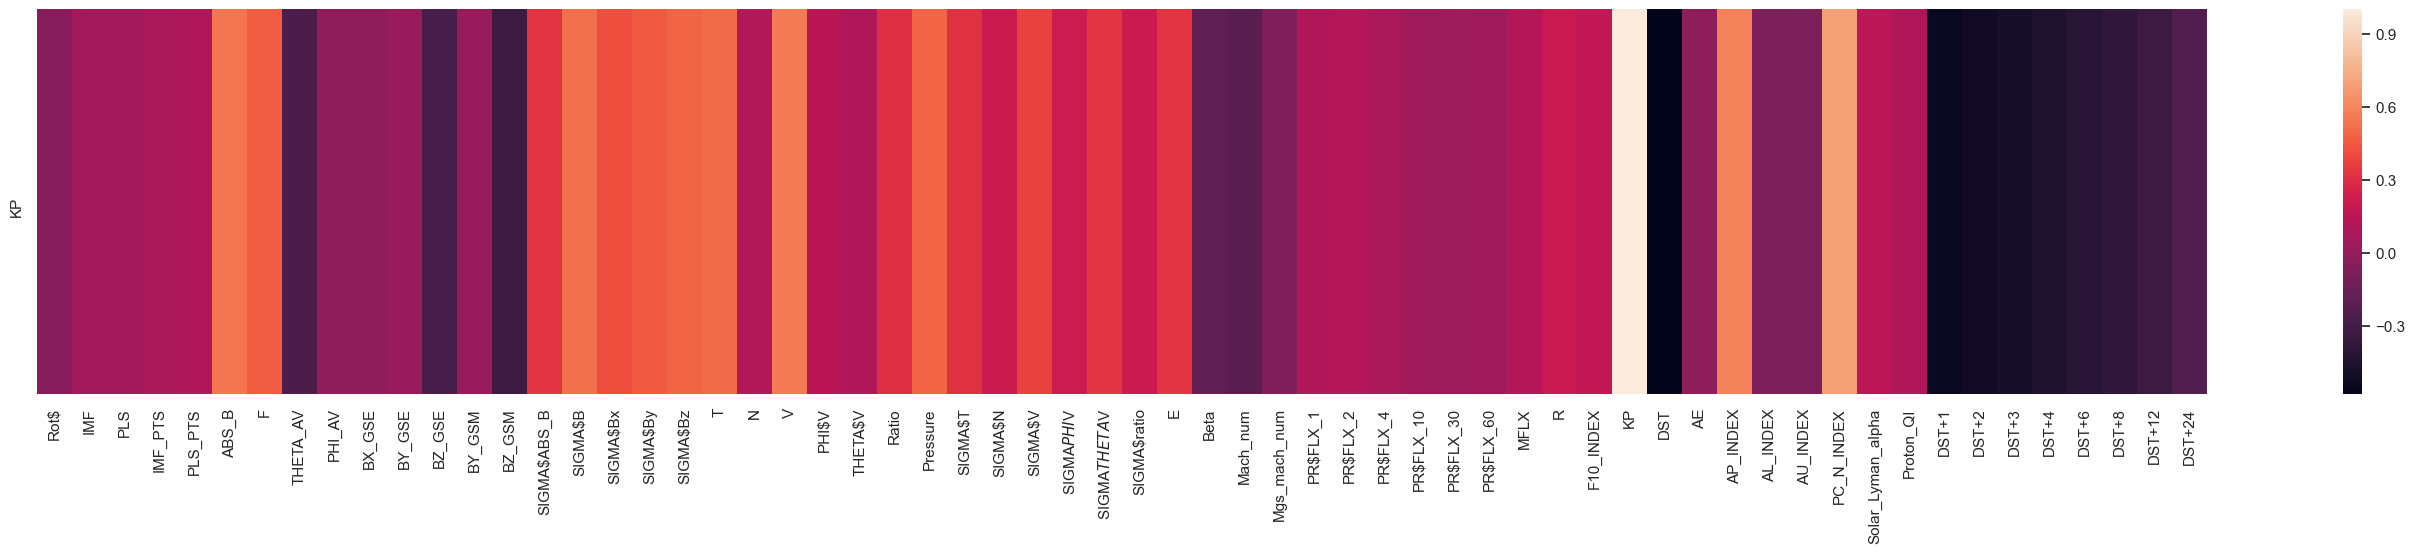

In [13]:
sn.set(rc = {'figure.figsize':(35,5)})
sn.heatmap(df.corr(method='pearson').iloc[46:47, 1:])
plt.show()
# najv. korel. : THETA_AV, BZ_GSE, BZ_GSM,N, Beta, Mach_num, Mgs_mach_num, ABS_B, F, T, V, E, KP, AP_INDEX, PC_N_INDEX

In [17]:
df.corr(method='pearson')

,Unnamed: 0,Rot$,IMF,PLS,IMF_PTS,PLS_PTS,ABS_B,F,THETA_AV,PHI_AV,...,Solar_Lyman_alpha,Proton_QI,DST+1,DST+2,DST+3,DST+4,DST+6,DST+8,DST+12,DST+24
Unnamed: 0,1.00,0.80,-0.09,-0.19,-0.54,-0.45,-1.61e-01,-1.49e-01,-9.03e-03,-1.78e-02,...,-0.05,-0.05,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
Rot$,0.80,1.00,-0.05,-0.15,-0.39,-0.35,-1.61e-01,-1.49e-01,-9.03e-03,-1.78e-02,...,-0.04,-0.05,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
IMF,-0.09,-0.05,1.00,0.62,0.70,0.43,-4.32e-02,-4.31e-02,6.14e-05,-7.65e-03,...,-0.08,-0.03,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04
PLS,-0.19,-0.15,0.62,1.00,0.58,0.68,-6.86e-03,-8.98e-03,-1.78e-03,-4.06e-03,...,-0.04,-0.03,-0.05,-0.05,-0.05,-0.05,-0.05,-0.04,-0.04,-0.04
IMF_PTS,-0.54,-0.39,0.70,0.58,1.00,0.66,1.39e-04,-8.81e-03,4.33e-04,2.54e-02,...,-0.01,0.01,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DST+4,0.04,0.04,-0.04,-0.05,-0.04,-0.07,-2.44e-01,-2.35e-01,6.73e-02,-3.57e-03,...,-0.20,-0.17,0.91,0.94,0.98,1.00,0.94,0.88,0.77,0.58
DST+6,0.04,0.04,-0.04,-0.05,-0.04,-0.07,-2.11e-01,-2.04e-01,4.79e-02,-3.88e-03,...,-0.20,-0.15,0.85,0.88,0.91,0.94,1.00,0.94,0.82,0.60
DST+8,0.04,0.04,-0.04,-0.04,-0.04,-0.07,-1.82e-01,-1.76e-01,3.36e-02,-5.00e-03,...,-0.20,-0.14,0.79,0.82,0.85,0.88,0.94,1.00,0.88,0.62
DST+12,0.04,0.04,-0.04,-0.04,-0.04,-0.07,-1.38e-01,-1.31e-01,1.52e-02,-7.20e-03,...,-0.20,-0.11,0.71,0.72,0.75,0.77,0.82,0.88,1.00,0.69


In [18]:
print(df.corr())

            Unnamed: 0  Rot$   IMF   PLS  IMF_PTS  PLS_PTS     ABS_B  \
Unnamed: 0        1.00  0.80 -0.09 -0.19    -0.54    -0.45 -1.61e-01   
Rot$              0.80  1.00 -0.05 -0.15    -0.39    -0.35 -1.61e-01   
IMF              -0.09 -0.05  1.00  0.62     0.70     0.43 -4.32e-02   
PLS              -0.19 -0.15  0.62  1.00     0.58     0.68 -6.86e-03   
IMF_PTS          -0.54 -0.39  0.70  0.58     1.00     0.66  1.39e-04   
...                ...   ...   ...   ...      ...      ...       ...   
DST+4             0.04  0.04 -0.04 -0.05    -0.04    -0.07 -2.44e-01   
DST+6             0.04  0.04 -0.04 -0.05    -0.04    -0.07 -2.11e-01   
DST+8             0.04  0.04 -0.04 -0.04    -0.04    -0.07 -1.82e-01   
DST+12            0.04  0.04 -0.04 -0.04    -0.04    -0.07 -1.38e-01   
DST+24            0.04  0.04 -0.04 -0.04    -0.04    -0.06 -6.42e-02   

                   F  THETA_AV    PHI_AV  ...  Solar_Lyman_alpha  Proton_QI  \
Unnamed: 0 -1.49e-01 -9.03e-03 -1.78e-02  ...           

In [19]:
import seaborn as sn
import matplotlib.pyplot as plt

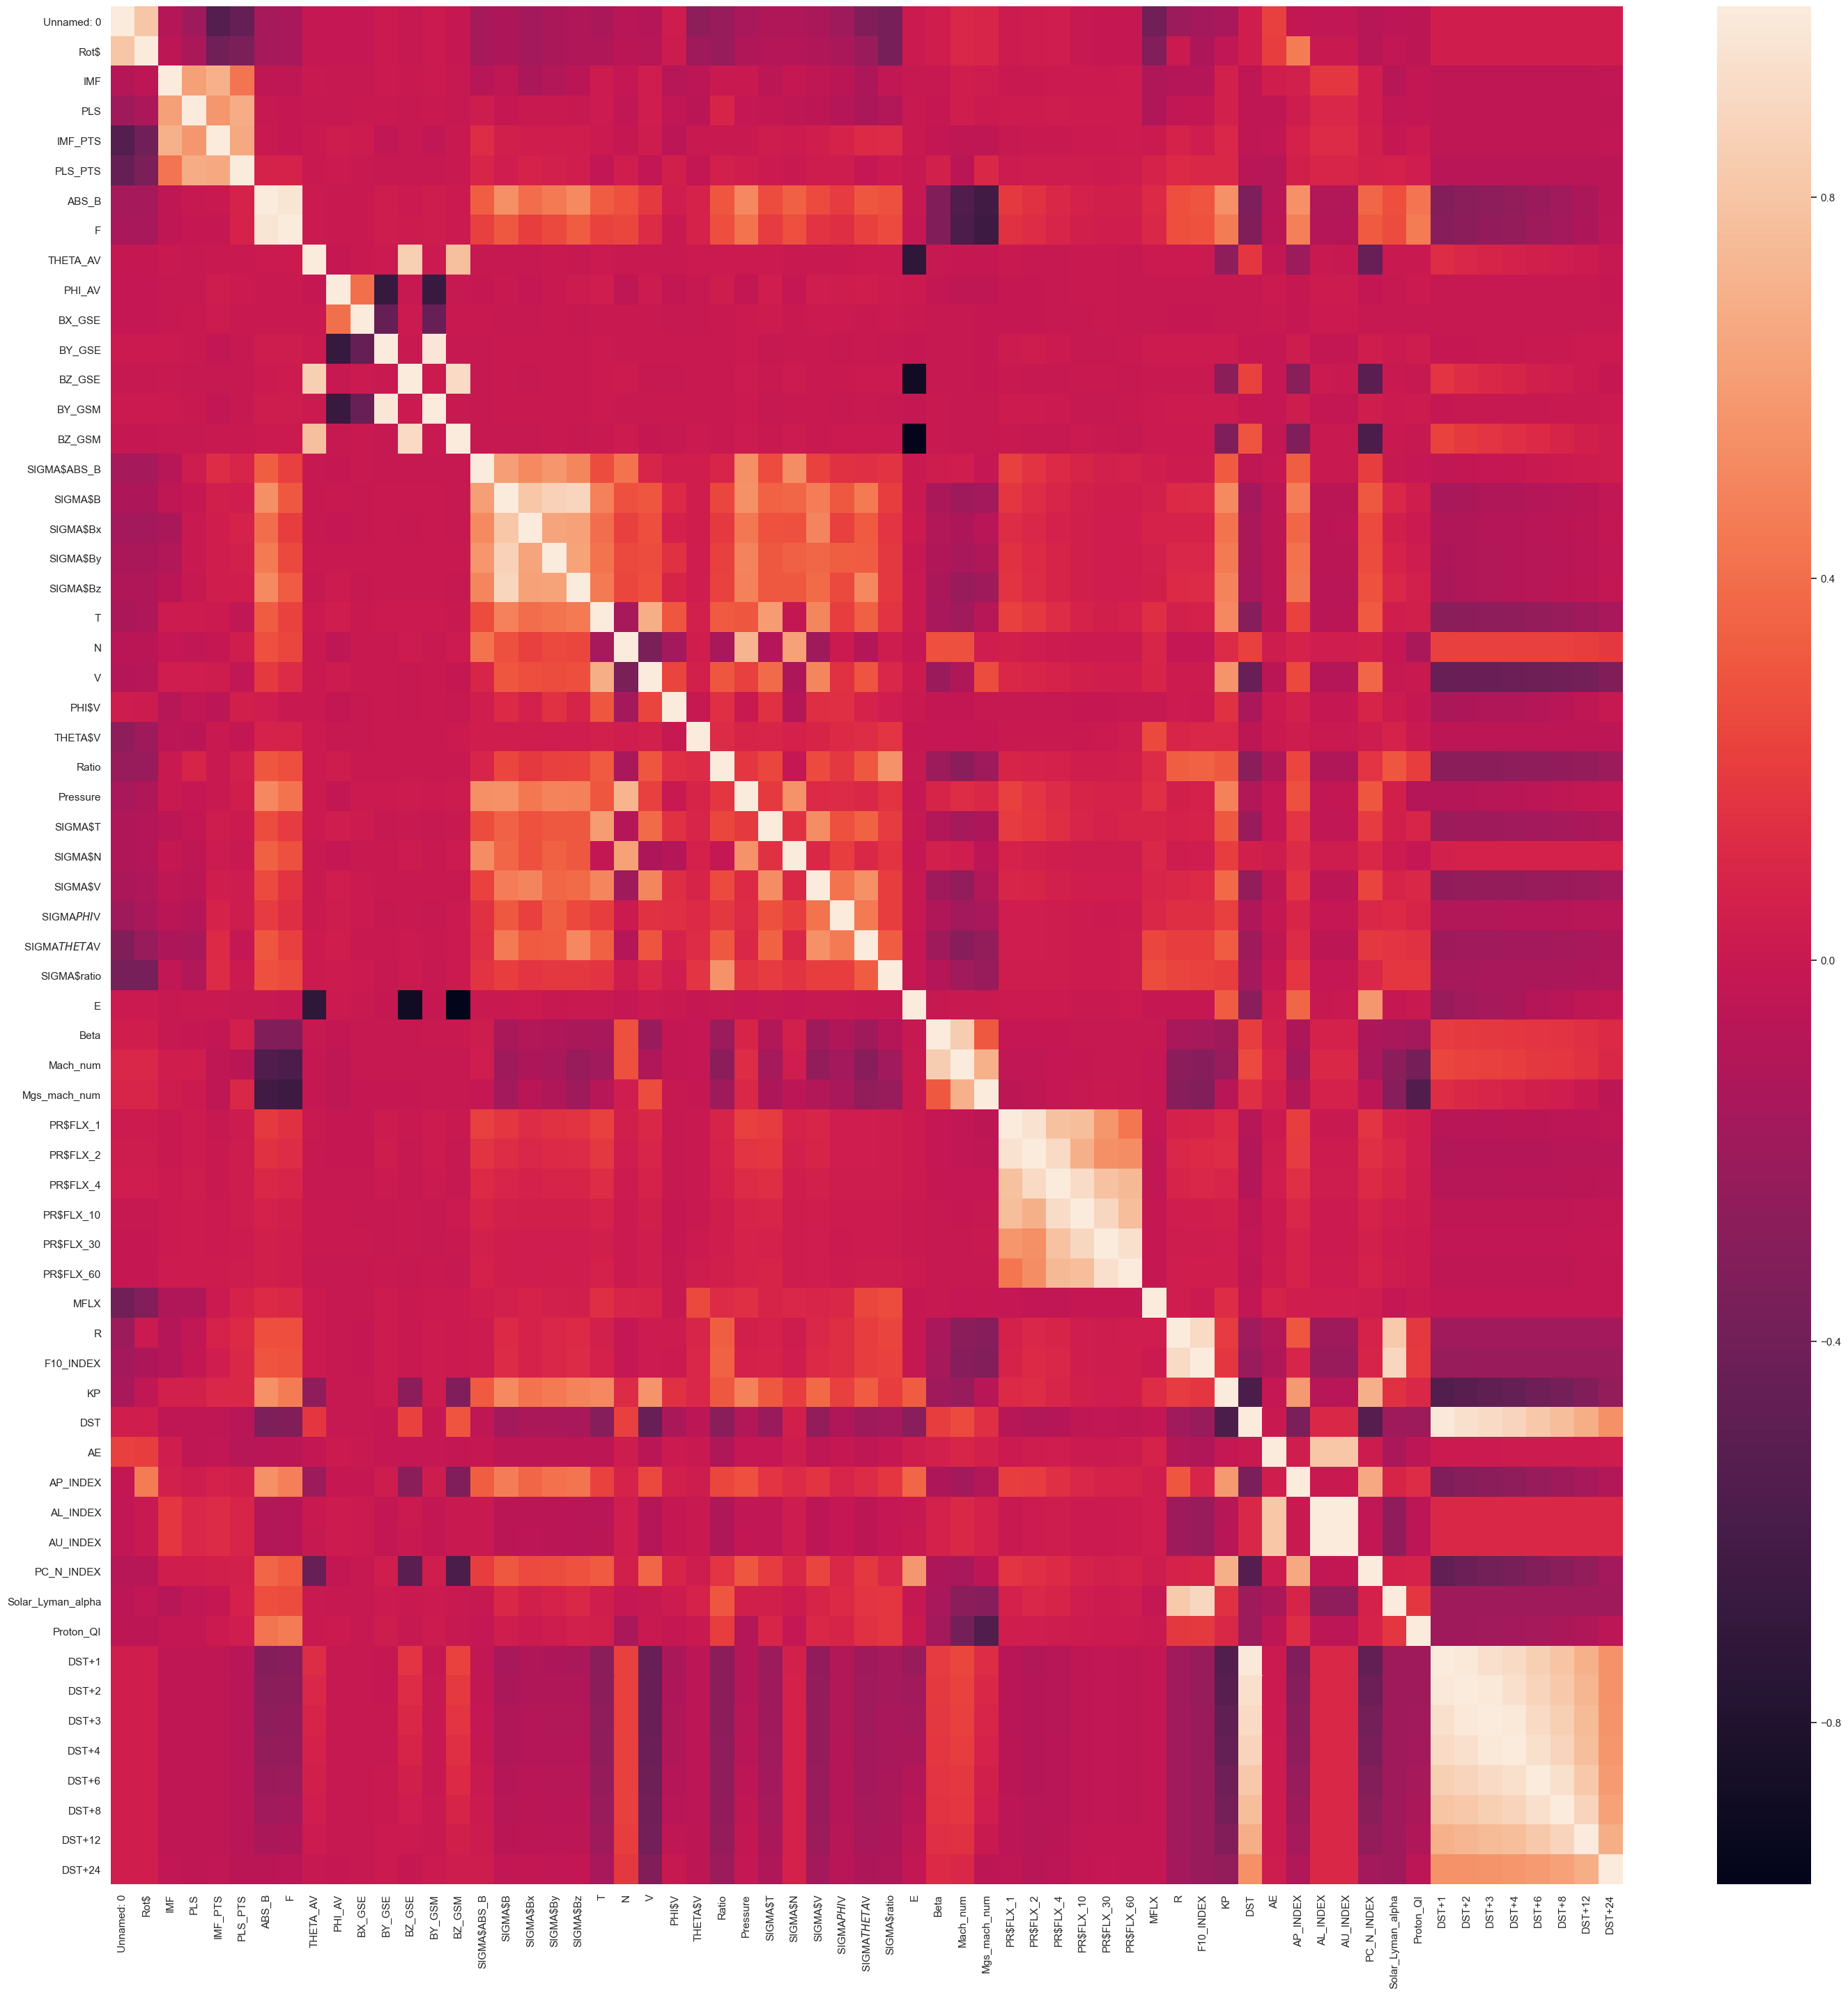

In [20]:
sn.set(rc = {'figure.figsize':(35,35)})
sn.heatmap(df.corr(method='pearson'))
plt.show()

In [22]:
features = ['time1', 
            'E',
            'Solar_Lyman_alpha',
            'IMF',
            'IMF_PTS',
            'BZ_GSE',
            'BZ_GSM',
            'DST',
            'F10_INDEX']

# Šimon chcel skúsiť tieto features: electron density, solar wind velocity, IMF magnetic field vector, Bz, Dst, clock angle, F10.7]

In [23]:
df_1=df[features]

In [24]:
df_1.columns

Index(['time1', 'E', 'Solar_Lyman_alpha', 'IMF', 'IMF_PTS', 'BZ_GSE', 'BZ_GSM',
       'DST', 'F10_INDEX'],
      dtype='object')

In [25]:
df_1.corr(method='pearson')

,E,Solar_Lyman_alpha,IMF,IMF_PTS,BZ_GSE,BZ_GSM,DST,F10_INDEX
E,1.00e+00,-1.04e-02,-5.25e-04,-1.37e-05,-8.83e-01,-9.70e-01,-0.29,-1.56e-02
Solar_Lyman_alpha,-1.04e-02,1.00e+00,-8.38e-02,-1.36e-02,4.03e-03,7.19e-03,-0.20,8.99e-01
IMF,-5.25e-04,-8.38e-02,1.00e+00,7.04e-01,1.92e-03,-2.99e-03,-0.04,-9.00e-02
IMF_PTS,-1.37e-05,-1.36e-02,7.04e-01,1.00e+00,-4.48e-03,1.76e-03,-0.04,3.42e-02
BZ_GSE,-8.83e-01,4.03e-03,1.92e-03,-4.48e-03,1.00e+00,9.10e-01,0.22,4.63e-03
BZ_GSM,-9.70e-01,7.19e-03,-2.99e-03,1.76e-03,9.10e-01,1.00e+00,0.29,1.16e-02
DST,-2.91e-01,-1.97e-01,-4.46e-02,-4.48e-02,2.25e-01,2.93e-01,1.00,-2.16e-01
F10_INDEX,-1.56e-02,8.99e-01,-9.00e-02,3.42e-02,4.63e-03,1.16e-02,-0.22,1.00e+00


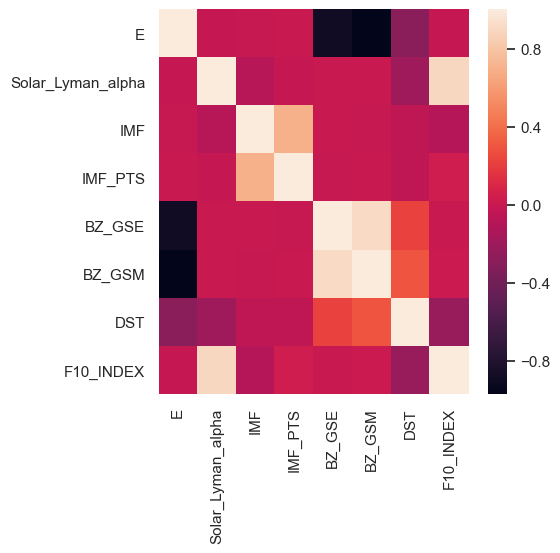

In [26]:
sn.set(rc = {'figure.figsize':(5,5)})
sn.heatmap(df_1.corr(method='pearson'))
plt.show()

In [82]:
features_2 = ['ABS_B', 
            'F',
            'N',
            'T',
            'Mach_num',
            'BZ_GSM',
            'Ratio',
            'V',
            'Beta',
            'E',
            'DST']

In [83]:
df_2=df[features_2]

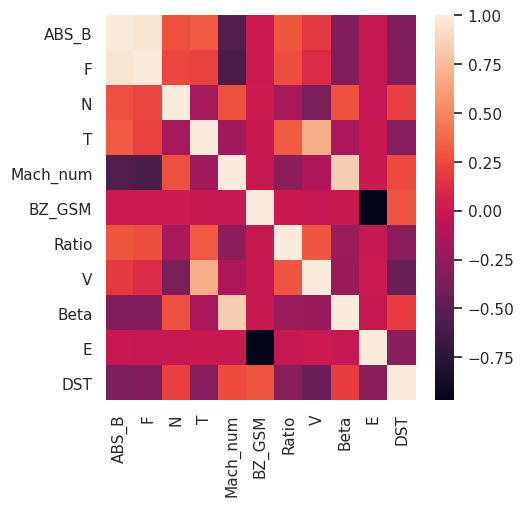

In [84]:
sn.set(rc = {'figure.figsize':(5,5)})
sn.heatmap(df_2.corr(method='pearson'))
plt.show()

In [92]:
features_3 = ['time1','THETA_AV', 'BZ_GSE', 'BZ_GSM','N', 'Beta', 'Mach_num', 'Mgs_mach_num', 'ABS_B', 'F', 'T', 'V', 'E', 'KP', 'AP_INDEX']
#, 'PC_N_INDEX' veľa chýbajúcich hodnôt

In [93]:
df_3=df[features_3]

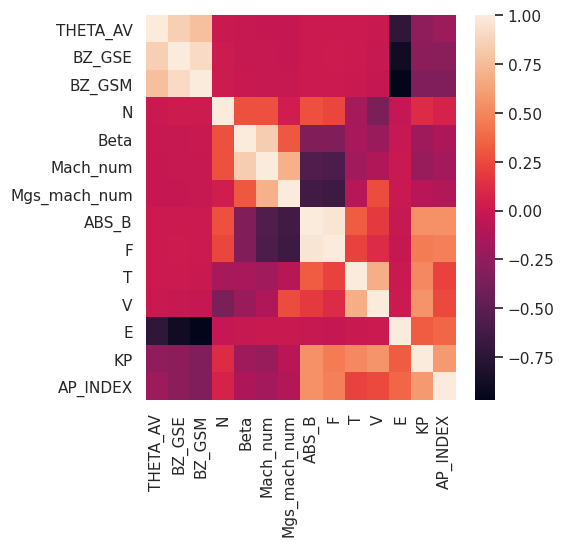

In [94]:
sn.set(rc = {'figure.figsize':(5,5)})
sn.heatmap(df_3.corr(method='pearson'))
plt.show()

In [ ]:
df_3.plot('time1',subplots=True, figsize=(40,80))
plt.show()